# Z-Boxes Case Study (Packeta)

# 1. Introduction
Our Chief Network Officer (CNO) came to your desk and asked you to help him with deciding **where to 
place 3,000 new Z-Boxes.** CNO’s main task is to run sales teams which find and contract attractive
locations for new boxes in order to achieve their maximum utilization. Your task is to recommend how 
many new boxes they should build in each Disctrict (City) considering the population size and 
already existing box infrastructure. Please segment the municipalities into 4-5 categories based on the 
population size.

Towards the end of your conversation CNO also asked you to prepare a list of main criteria his team should 
consider when selecting specific locations for Z-Boxes.

*You have been provided with a list of existing Z-Boxes. Any other data you will need to obtain by yourself.*

## Packeta Boxes dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Provided Dataset from Packeta boxes across Czech Republic

# Path to the Excel file
path_raw = '/kaggle/input/packeta-dataset/Z-box Fact Table.xlsx'

# Read table
df_raw = pd.read_excel(path_raw, sheet_name='Raw data',skiprows=2)

df_raw.head()

,Box ID,Area Code,City,Street,Postal Code
0,1,500208,Praha,Na Poli 20,182 00
1,2,500186,Praha,Dělnická 217/3,170 00
2,3,500216,Praha,Pod Harfou 995/23,190 00
3,4,538671,Přezletice,V Uličce,250 73
4,5,534722,Byšice,Tyršovo náměstí,277 32


# 2. Objectives

- **Task 1 Create a plan for building new Z-Boxes in Czech Republic:** Recommend how many new boxes they should build in each disctrict (city) considering the population size and already existing box infrastructure. Please segment the municipalities into 4-5 categories based on the population size.
- **Task 2 Visually represent your recommendations:** After analyzing the current network distribution and creating the plan for building new boxes, visually represent your results and recommendations. CNO is expected to present the box expansion plan to the board of directors in 5 days and he wants to use your visualizations to explain the plan.
- **Task 3 Conduct a quick competition research:** Research who are four main competitors of Packeta that provide automated parcel boxes in Czech Republic. Try to download the list of box locations for at least two of them. Describe the tools you have used and the limitations you have encountered.


# 3. Methodology

### 1. Population Data Gathering from [CSU official website](https://www.czso.cz/csu/czso/pocet-obyvatel-v-obcich-9vln2prayv) (latest data 1.1.2024)

### 2. Data Cleaning & and creation of DIM and FACT tables in MS excel

In [3]:
# Merged final fact table (Population data merged with provided packeta dataset via Area Code)

# Path to the Excel file
path_fact = '/kaggle/input/fact-dataset/Fact_table.xlsx'

# Read table
df_fact = pd.read_excel(path_fact, sheet_name='Fact_table')

df_fact.head()


,Code_of_territory,PopulationSegment,Population,Count of Z-box
0,CZ0643,"Small (<10,000)",222129,121
1,CZ0802,"Small (<10,000)",126395,54
2,CZ0635,"Small (<10,000)",87144,35
3,CZ0534,"Small (<10,000)",96758,63
4,CZ0533,"Small (<10,000)",78068,42


In [4]:
# Region Dimension Table (Connected to Disctrict DIM table via Code_of_Region)

# Path to the Excel file
path_reg_dim = '/kaggle/input/packeta-dataset/Dim Tables.xlsx'

# Read Region Dimension Table
df_reg = pd.read_excel(path_reg_dim, sheet_name='Dim Region Table')

df_reg.head()

,Code_of_Region,Region_Name
0,CZ010,Hlavní město Praha
1,CZ020,Středočeský kraj
2,CZ031,Jihočeský kraj
3,CZ032,Plzeňský kraj
4,CZ041,Karlovarský kraj


In [5]:
# Disctrict Dimension Table (Connected to Fact table via Code_of_territory)

# Path to the Excel file
path_distr_dim = '/kaggle/input/packeta-dataset/Dim Tables.xlsx'

# Read Disctrict Dimension Table
df_distr = pd.read_excel(path_distr_dim, sheet_name='Dim District Table')

df_distr.head()

,Code_of_territory,District_Name,Code_of_Region
0,CZ0100,Praha,CZ010
1,CZ0201,Benešov,CZ020
2,CZ0202,Beroun,CZ020
3,CZ0203,Kladno,CZ020
4,CZ0204,Kolín,CZ020


### 3. Data Transformations in Power Query and Data modeling in PowerBI model (Snowflake Schema)

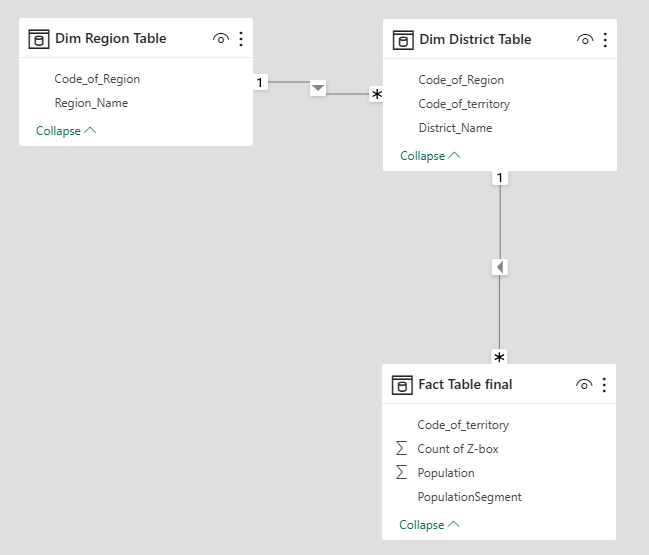

### 4. Data analysis using Python

In [6]:
# Load the merged dataset from the CSV file
file_path = '/kaggle/input/powerbi-dataset/script.csv'
# Load the data with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

data.head()

,Region_Name,District_Name,PopulationSegment,Population,ZBox_Count
0,Středočeský kraj,Mělník,Small,58766,50
1,Plzeňský kraj,Plzeň-město,Small,20414,8
2,Olomoucký kraj,Olomouc,Small,112135,56
3,Ústecký kraj,Chomutov,Small,25261,18
4,Pardubický kraj,Svitavy,Small,78068,42


In [7]:
# Calculate the total current number of Z-boxes
total_zboxes = data['ZBox_Count'].sum()

# Calculate the total population
total_population = data['Population'].sum()

# Calculate the proportion of new Z-boxes based on population size
new_zboxes = 3000
data['Proportion'] = data['Population'] / total_population
data['New_ZBox_Addition'] = (data['Proportion'] * new_zboxes)

# Ensure no new ZBox count is less than the original count
data['Final_ZBox_Count'] = data['ZBox_Count'] + data['New_ZBox_Addition']
data.loc[data['Final_ZBox_Count'] < data['ZBox_Count'], 'Final_ZBox_Count'] = data['ZBox_Count']

In [8]:
data

,Region_Name,District_Name,PopulationSegment,Population,ZBox_Count,Proportion,New_ZBox_Addition,Final_ZBox_Count
0,Středočeský kraj,Mělník,Small,58766,50,0.005391,16.173305,66.173305
1,Plzeňský kraj,Plzeň-město,Small,20414,8,0.001873,5.618246,13.618246
2,Olomoucký kraj,Olomouc,Small,112135,56,0.010287,30.861273,86.861273
3,Ústecký kraj,Chomutov,Small,25261,18,0.002317,6.952215,24.952215
4,Pardubický kraj,Svitavy,Small,78068,42,0.007162,21.485512,63.485512
...,...,...,...,...,...,...,...,...
154,Moravskoslezský kraj,Karviná,Large,69694,16,0.006394,19.180858,35.180858
155,Moravskoslezský kraj,Opava,Large,55600,5,0.005101,15.301973,20.301973
156,Kraj Vysočina,Jihlava,Large,53986,8,0.004953,14.857776,22.857776
157,Moravskoslezský kraj,Frýdek-Místek,Large,53938,12,0.004948,14.844565,26.844565


In [9]:
sum_before = data['ZBox_Count'].sum()
sum_after = data['Final_ZBox_Count'].sum()

sum_before, sum_after

(3722, 6722.0)


### 5. application of created calculations into DAX (key metrics were Population Proportion and Zbox Proportion)
### 6. Data Visualizations in PowerBI desktop

# 4. Results

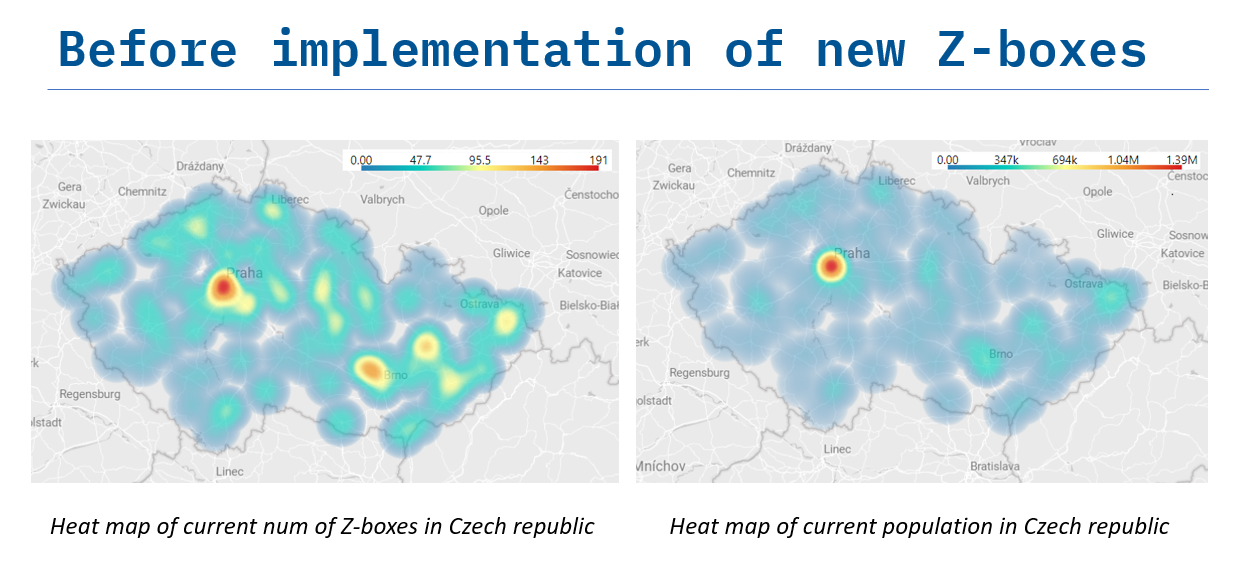

In [10]:
from IPython.display import Image, display

# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/before_implementation.PNG'))

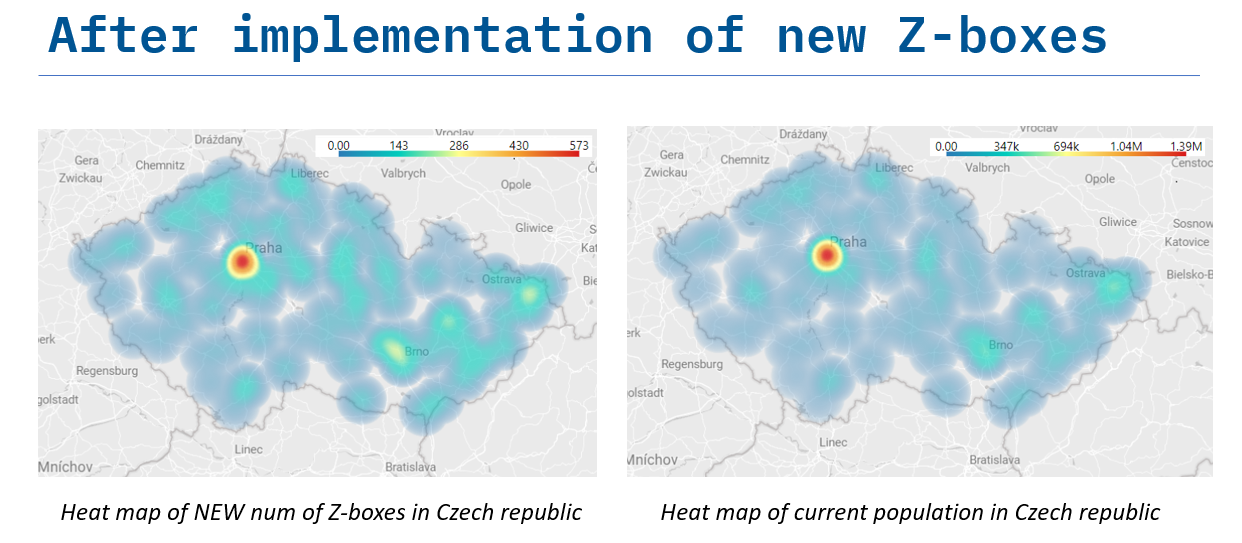

In [11]:
# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/after_implementation.PNG'))

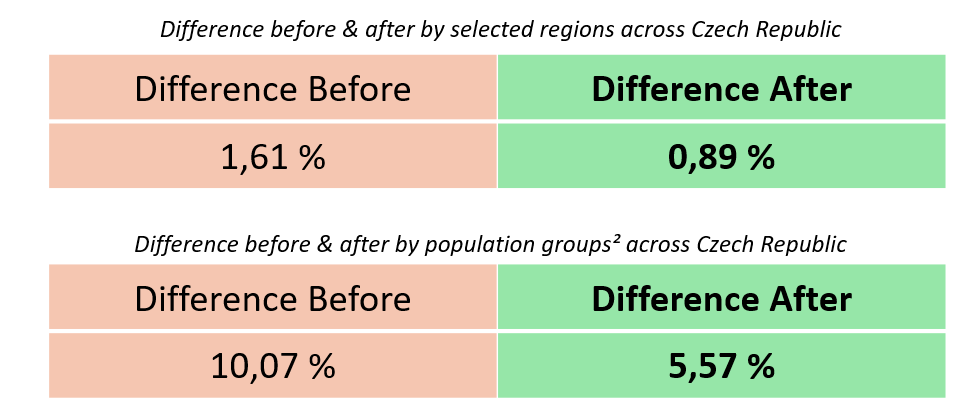

In [12]:
# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/difference.PNG'))

- My goal was to get similar Population & Z-box Proportions across Czech republic. 
- My new Z-Box distribution across Czech republic decrease the difference between Population & Z-Box Proportion by nearly 50%.
- Population / Z-box proportion is calculated as a division of population / num of z-boxes for selected region/city or other group by whole in Country.

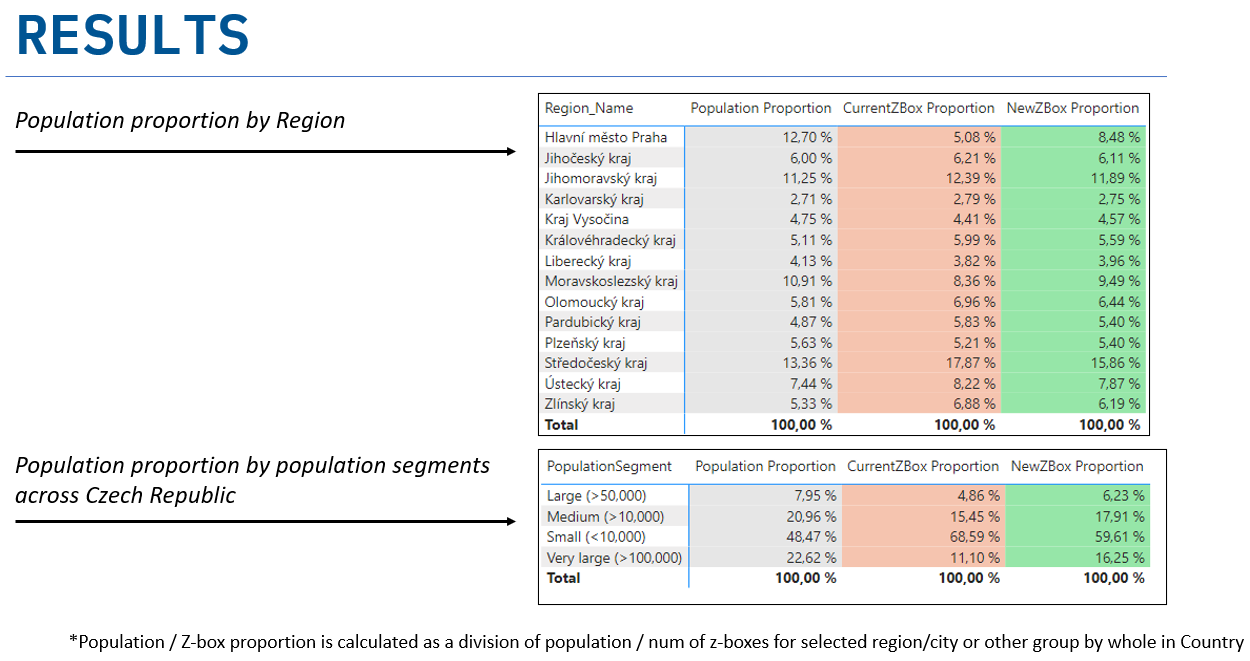

In [13]:
# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/table01.PNG'))

# 5. Conclusion

 - The primary goal was to achieve a balanced proportion between the population and the distribution of Z-Boxes, enhancing accessibility and utilization. 
 - Results indicate that the new distribution plan has significantly decreased the disparity, making Z-Boxes more accessible to a larger portion of the population. 
 - The next steps should be to include other important influences like age, areas, the number of inhabitants per square km etc.

# 6. Appendix

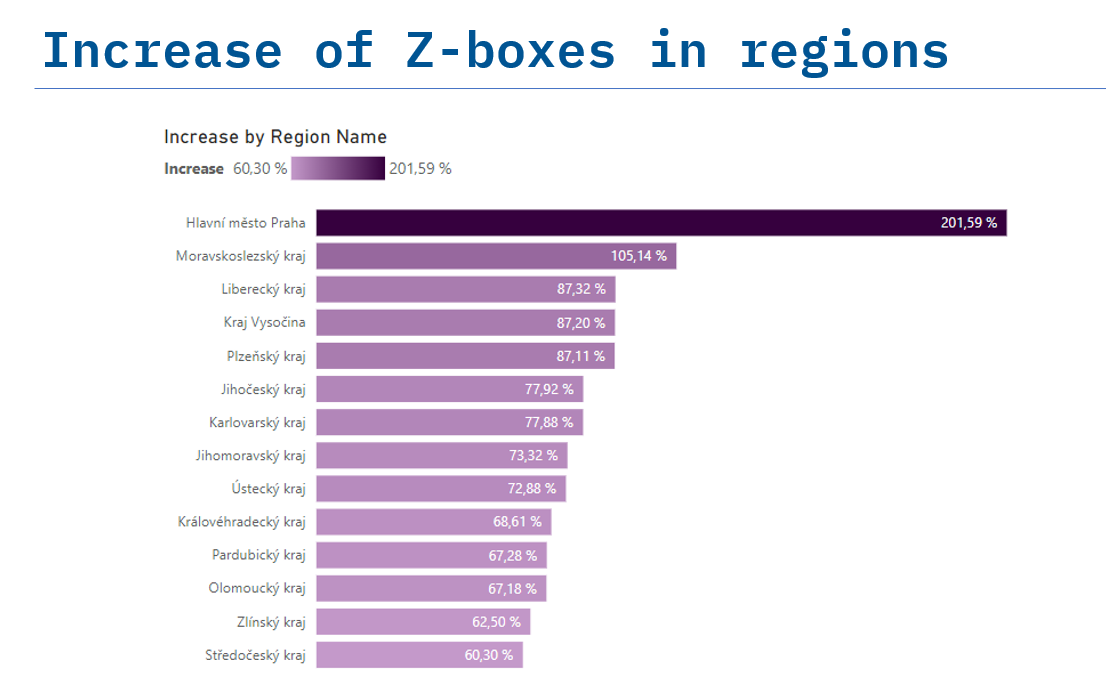

In [14]:
# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/graph01.PNG'))

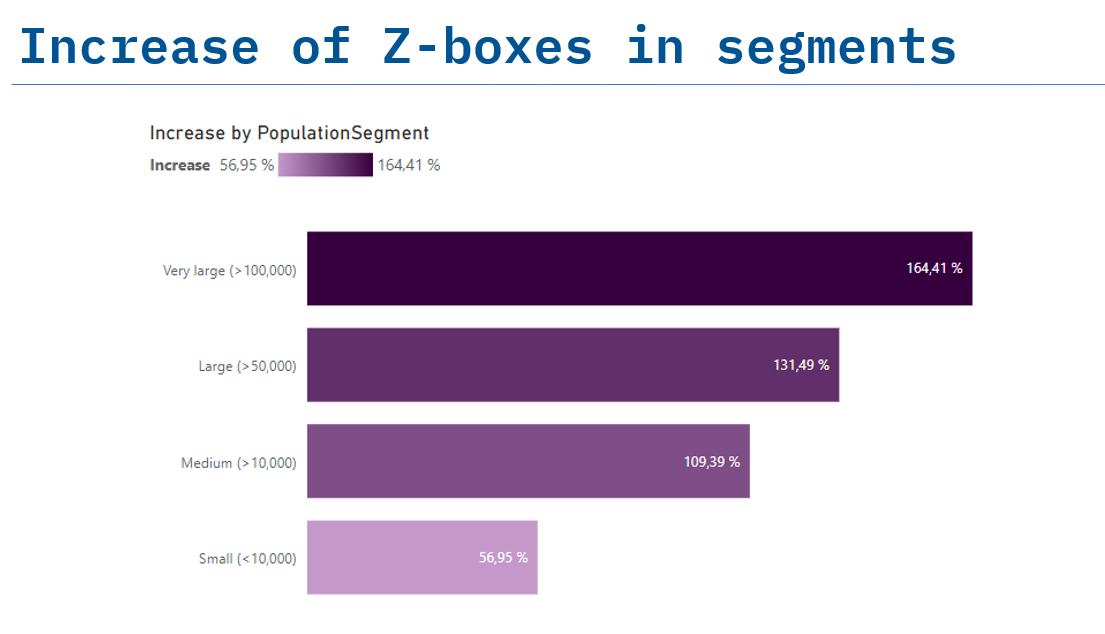

In [15]:
# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/graph02.PNG'))

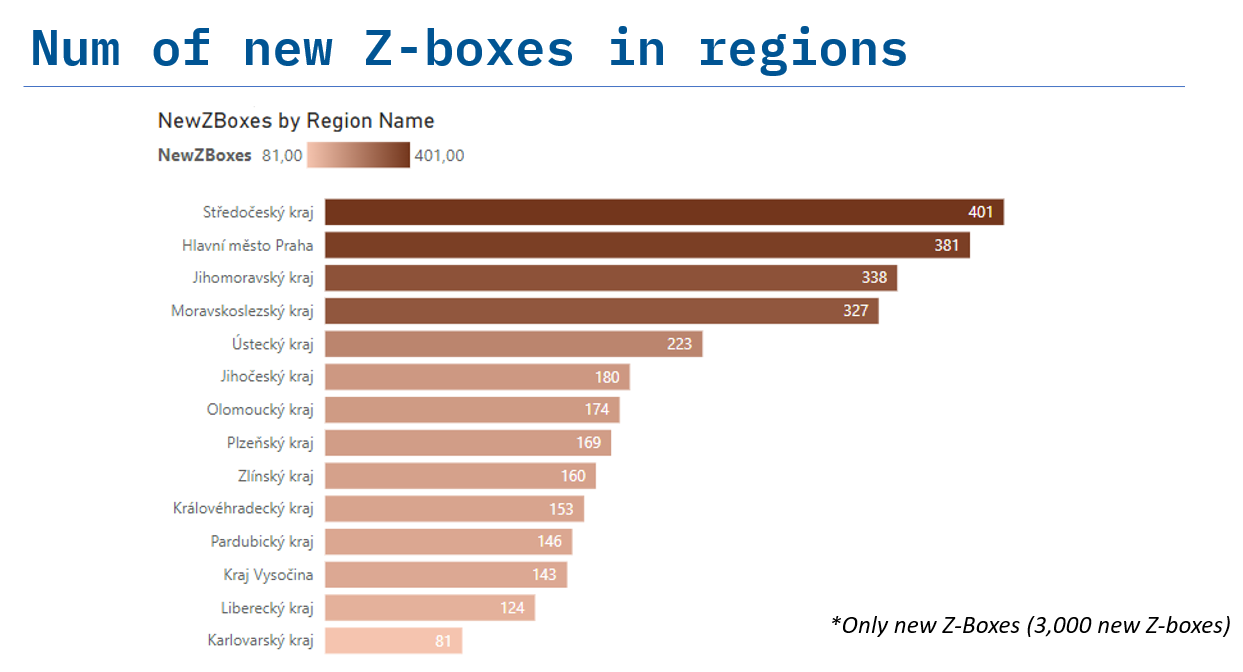

In [16]:
# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/graph03.PNG'))

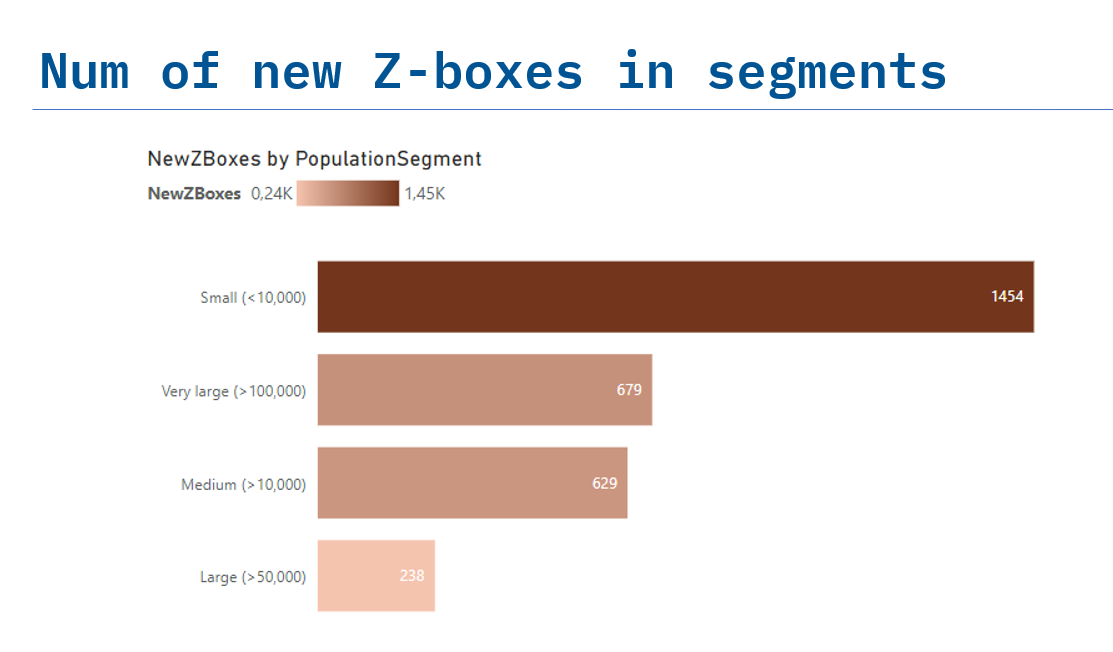

In [17]:
# Display the image
display(Image(filename='/kaggle/input/powerbi-graphs/graph04.PNG'))